In [2]:
import sys
import os
spr_path = "/Users/Dixit/Documents/Studies/CU_Boulder/sem3/Independent_study/code/SpringRank/python"
sys.path.append(os.path.abspath(spr_path))
import SpringRank_tools as SR
import csv
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import time
import pandas as pd
import math
import re
import matplotlib.ticker as ticker
import networkx as nx
import numpy as np
import SpringRank_tools as sr
import tools as tl

In [4]:
input_data_dir = '/Users/Dixit/Documents/Studies/CU_Boulder/sem3/Independent_study/github/SpringRank/data/input/'
output_data_dir = '/Users/Dixit/Documents/Studies/CU_Boulder/sem3/Independent_study/github/SpringRank/data/output/'

In [6]:
# Read files 
# Dataset - > https://www.kaggle.com/open-source-sports/professional-hockey-database
def getAdjByYear(year,nextIdx,teamIdMap,Adj_All,Adj_years):
    score_map = {}
    with open(input_data_dir+"NHL/"+str(year)+"_NHL",'r') as nhl:
        nhl = csv.reader(nhl,delimiter=',')
        for row in nhl:
            if row[1] not in teamIdMap:
                teamIdMap[row[1]] = nextIdx
                nextIdx+=1
            if row[2] not in teamIdMap:
                teamIdMap[row[2]] = nextIdx
                nextIdx+=1
            i = teamIdMap[row[1]]
            j = teamIdMap[row[2]]
            score_map[(row[1],row[2])] = int(row[3])
    Adj = np.zeros((len(teamIdMap),len(teamIdMap)),dtype=np.int)
    for ((a,b),j) in score_map.items():
        k = int(teamIdMap[a])
        l = int(teamIdMap[b])
        Adj[k,l] += score_map[(a,b)]
    Adj = np.matrix(Adj,copy=False)
    Adj_All.append(Adj);Adj_years.append(str(year))
    return Adj,nextIdx,teamIdMap,Adj_All,Adj_years

In [9]:
# Read files and get adjacency for each year separately
# find a better way
teamIdMap = {}
nextIdx = 0;
Adj_All = []
Adj_years = []
#1980 - 1989
Adj_1980,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(1980,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_1981,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(1981,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_1982,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(1982,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_1983,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(1983,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_1984,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(1984,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_1985,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(1985,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_1986,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(1986,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_1987,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(1987,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_1988,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(1988,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_1989,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(1989,nextIdx,teamIdMap,Adj_All,Adj_years)
#1990 - 1999
Adj_1990,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(1990,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_1991,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(1991,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_1992,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(1992,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_1993,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(1993,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_1994,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(1994,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_1995,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(1995,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_1996,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(1996,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_1997,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(1997,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_1998,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(1998,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_1999,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(1999,nextIdx,teamIdMap,Adj_All,Adj_years)
#2000 - 2011
Adj_2000,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(2000,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_2001,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(2001,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_2002,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(2002,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_2003,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(2003,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_2004,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(2004,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_2005,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(2005,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_2006,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(2006,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_2007,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(2007,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_2008,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(2008,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_2009,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(2009,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_2010,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(2010,nextIdx,teamIdMap,Adj_All,Adj_years)
Adj_2011,nextIdx,teamIdMap,Adj_All,Adj_years = getAdjByYear(2011,nextIdx,teamIdMap,Adj_All,Adj_years)



In [189]:
# total number of teams
len(teamIdMap)

37

In [190]:
# SR 
def run(A,alpha,l0,l1):
    '''
    Extracts SpringRank
    '''
    rank=sr.SpringRank(A,alpha=alpha,l0=l0,l1=l1)
    rank=tl.shift_rank(rank)   # (optional) shifts so that the min is in zero and the others are positive
    
    unordered_tuples=[(i,rank[i]) for i in range(A.shape[0])]
    return rank,unordered_tuples

def save(sorted_tuples,alpha,l0,l1,G,file):
    '''
    Prints results
    '''
    print('SpringRank scores:')
    outfile=output_data_dir+'/'+file+'_SpringRank_'+'a'+str(alpha)+'_l0_'+str(l0)+'_l1_'+str(l1)+'.dat'
    outf=open(outfile,'w')

    for i in range(G.number_of_nodes()):
        outf.write("{} {}\n".format(sorted_tuples[i][0],sorted_tuples[i][1]))
    print('Results saved in:', outfile)
    outf.close()
    


In [193]:
def getEqn39(rank,A,start,end,step):
    x = np.arange(start,end,step)
    y=[]
    for xi in x:
        y.append(tl.eqs39(xi,rank,A))
    return x,y

def eqn39SimplePlot(rank,A,save):
    x,y = getEqn39(rank,A,0.1,20,1)
    plt.plot(x,y)
    plt.title('Eqn 39 :'+save)
    if save:
        plt.savefig(output_data_dir+save+'.svg')


def prediction(beta,Adj,scores):
    preds={}
    size=Adj.shape[0]
    for i in range(0,size):
        for j in range(0,size):
            si=0;sj=0
            if(Adj[(i,j)]>0 or Adj[(j,i)]>0):
                if(i<len(scores) and j<len(scores)):
                    si=scores[i];sj=scores[j]
                preds[(i,j)] = (1/(1+np.exp(-beta*2*(si-sj))))
            else: preds[(i,j)] = 0
    return preds


def prediction_old(beta,Adj,scores):
    preds={}
    size=Adj.shape[0]
    for i in range(0,size):
        for j in range(0,size):
            if(Adj[(i,j)]>0 or Adj[(j,i)]>0):
                preds[(i,j)] = (1/(1+np.exp(-beta*2*(scores[i]-scores[j]))))
            else: preds[(i,j)] = 0
    return preds

def getAccuracy(preds,Adj,num_edges):
    total=0
    size = Adj.shape[0]
    counter = 0
    #print(preds)
    for i in range(0,size):
        for j in range(0,size):
            if(i!=j and (Adj[(i,j)]>0 or Adj[(j,i)]>0)):
                x = ((Adj[i,j])-((Adj[i,j]+Adj[j,i])*preds[(i,j)]))
                total +=abs(x)

    total = 1-((total*1.0)/(2*num_edges))
    return total

In [192]:
def trainBetaAndRanks(A,alpha,l0,l1):
    ranks,tuples = run(A,alpha,l0,l1)
    temp=tl.get_optimal_temperature(ranks,A)
    beta = 1/temp
    print("Optimal Beta: "+str(beta))
    return beta,ranks

def getPredictionsAndAccuracy(beta,A,ranks):
    preds = prediction(beta,A,ranks)
    acc = getAccuracy(preds,A,A.sum())
    print("Accuracy : "+str(acc))
    return preds,acc


def trainingExperiment(A,alpha,l0,l1):
    beta,ranks = trainBetaAndRanks(A,alpha,l0,l1)
    preds,acc =  getPredictionsAndAccuracy(beta,A,ranks)
    return beta,ranks,preds,acc

def trainOneToMany(indexToTrain,Adj_All,Adj_years,title):
    accu_map = {}
    A1 = Adj_All[indexToTrain]
    A1_beta,A1_ranks,A1_preds,A1_acc = trainingExperiment(A1,0,0,1)
    null_adj = np.zeros((A1.shape[0],A1.shape[0]),dtype=np.int)
    null_adj = np.matrix(null_adj,copy=False)
    null_beta,null_ranks,_,__ = trainingExperiment(null_adj,0,0,1)
    for i in range(indexToTrain,len(Adj_years)):
        print(Adj_years[indexToTrain]+"-->"+Adj_years[i])
        A2 = Adj_All[i]
        A2_preds,A2_acc = getPredictionsAndAccuracy(A1_beta,A2,A1_ranks)
        null_preds,null_acc = getPredictionsAndAccuracy(null_beta,A2,null_ranks)
        accu_map[Adj_years[i]] = (A1_acc,A2_acc,null_acc)
    return accu_map

def trainManyToMany(Adj_All,Adj_years):
    accu_map_all = {}
    for i in range(0,len(Adj_All)-1):
        accu_map_all[Adj_years[i]] = trainOneToMany(i,Adj_All,Adj_years,Adj_years[i])
    return accu_map_all        
        

In [161]:
accu_map_all = trainManyToMany(Adj_All,Adj_years)

Optimal Beta: 1.0729593507436148
Accuracy : 0.812229814445
Optimal Beta: 100.0
Accuracy : nan
1980-->1980
Accuracy : 0.812229814445
Accuracy : 0.754814814815
1980-->1981
Accuracy : 0.7650109772
Accuracy : 0.757225433526
1980-->1982
Accuracy : 0.746012794096
Accuracy : 0.752454417952
1980-->1983
Accuracy : 0.720241584248
Accuracy : 0.740053050398
1980-->1984
Accuracy : 0.731950516847
Accuracy : 0.751358695652
1980-->1985
Accuracy : 0.747206737175
Accuracy : 0.764126149803
1980-->1986
Accuracy : 0.740717349232
Accuracy : 0.783801874163
1980-->1987
Accuracy : 0.733750056779
Accuracy : 0.759757738896
1980-->1988
Accuracy : 0.743826174147
Accuracy : 0.771870794078
1980-->1989
Accuracy : 0.74567129738
Accuracy : 0.781081081081
1980-->1990
Accuracy : 0.764373313693
Accuracy : 0.773351648352
1980-->1991
Accuracy : 0.720443483744


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:51: RuntimeWarning: invalid value encountered in true_divide


Accuracy : 0.762123197903
1980-->1992
Accuracy : 0.706321107323
Accuracy : 0.735682819383
1980-->1993
Accuracy : 0.727868299061
Accuracy : 0.740546218487
1980-->1994
Accuracy : 0.72901187623
Accuracy : 0.758652094718
1980-->1995
Accuracy : 0.712085570539
Accuracy : 0.749730893434
1980-->1996
Accuracy : 0.734144806164
Accuracy : 0.761388286334
1980-->1997
Accuracy : 0.724554216689
Accuracy : 0.743063263041
1980-->1998
Accuracy : 0.746518769659
Accuracy : 0.753968253968
1980-->1999
Accuracy : 0.735048153066
Accuracy : 0.749500998004
1980-->2000
Accuracy : 0.719000478616
Accuracy : 0.733766233766
1980-->2001
Accuracy : 0.730166891474
Accuracy : 0.742368177613
1980-->2002
Accuracy : 0.720549796092
Accuracy : 0.731127679404
1980-->2003
Accuracy : 0.732074677837
Accuracy : 0.738679245283
1980-->2004
Accuracy : nan
Accuracy : nan
1980-->2005
Accuracy : 0.75013397545
Accuracy : 0.760162601626
1980-->2006
Accuracy : 0.761934980262
Accuracy : 0.771544715447
1980-->2007
Accuracy : 0.77732061478
A

In [186]:
def plotYOYAccuracy(Adj_years,accu_map,title):
    def func_formatter(x,pos):
        if(pos<1 or pos > len(Adj_years)+3): return ""
        else:
            yr_regex = r"[0-9]{2}$"
            match = re.search(yr_regex,(str((int(x)))))
            return match.group(0)+'\''
        
    training_acc = []
    null_acc = []
    predic_acc = []
    x_axis = []
    xi = []
    for i in range(0,len(Adj_years)):
        (t,p,n) = accu_map[Adj_years[i]]
        null_acc.append(n)
        training_acc.append(t)
        predic_acc.append(p)
        x_axis.append(Adj_years[i])
        xi.append(x_axis)
    plt.figure(figsize=(15,5))
    plt.xlabel('Years')
    plt.ylabel('Accuracy')
    plt.ylim([0.6,1])
    plt.title(title)
    plt.plot(x_axis,training_acc,'o',label='training accuracy')
    plt.plot(x_axis,null_acc,'kx--',label='Null Model Accuracy')
    plt.plot(x_axis,predic_acc,'rx--',label='prediction accuracy')
    for (_idx,(_x,y1,y2)) in enumerate(zip(x_axis,predic_acc,null_acc)):
        plt.plot((_x,_x),(y1,y2),'y-') if y1>y2 else plt.plot((_x,_x),(y1,y2),'b-')
    plt.legend(loc='best')
    plt.margins(x=0.08,tight=True)
    ax = plt.axes()
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    _=ax.xaxis.set_major_formatter(ticker.FuncFormatter(func_formatter))
    plt.show()

In [187]:
def plotAllYears(Adj_years,accu_map_all):
    for i in range(0,len(Adj_years)-1):
        plotYOYAccuracy(Adj_years[i:],accu_map_all[Adj_years[i]],'Training Year: '+str(Adj_years[i]))

# Each plot shows a (training) year that was chosen to predict and find accuracy for future years

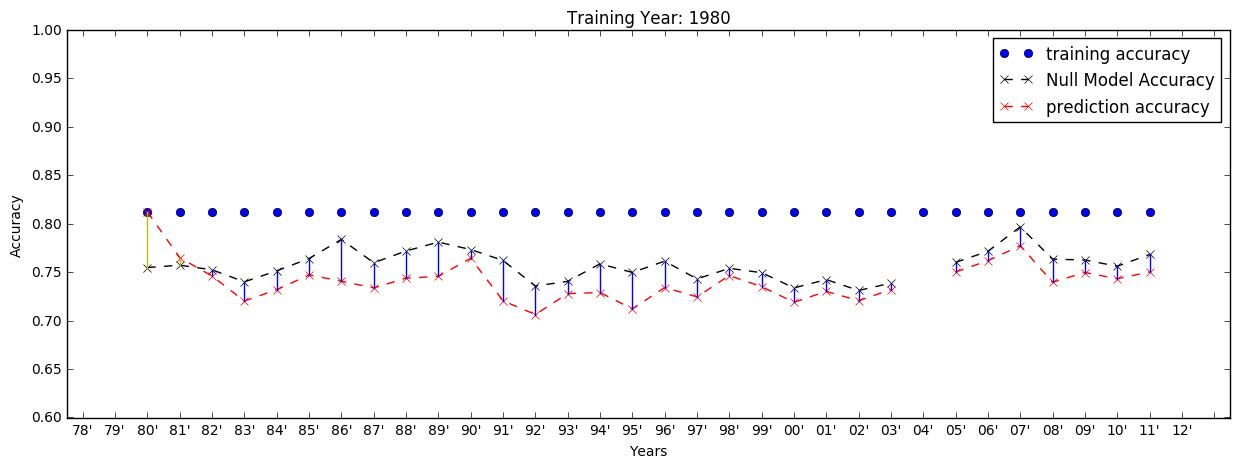

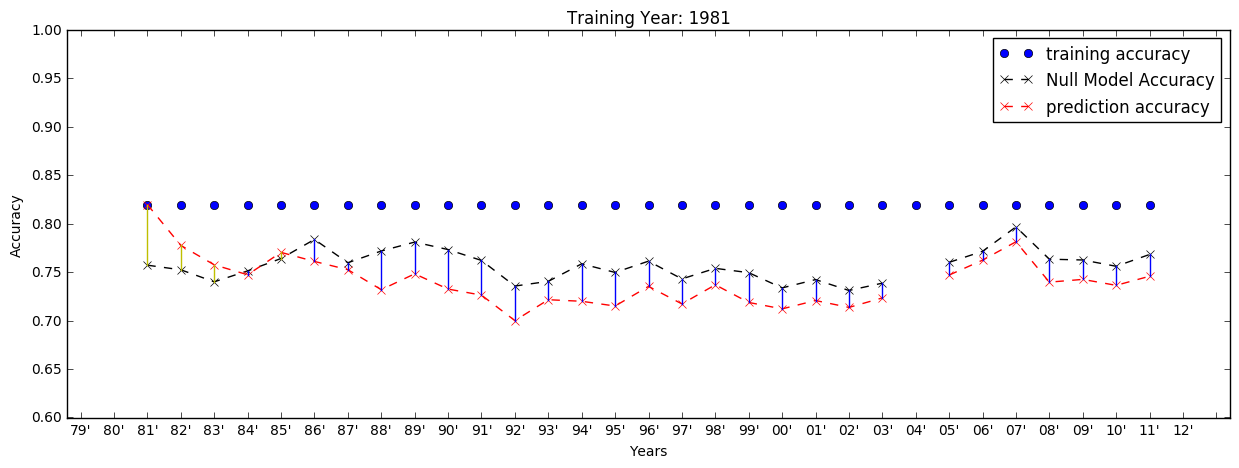

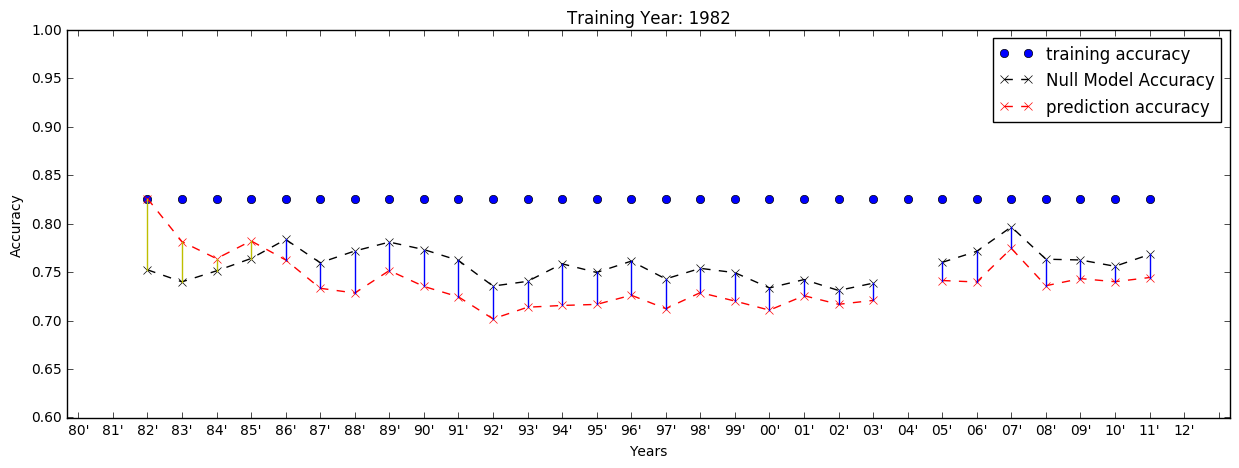

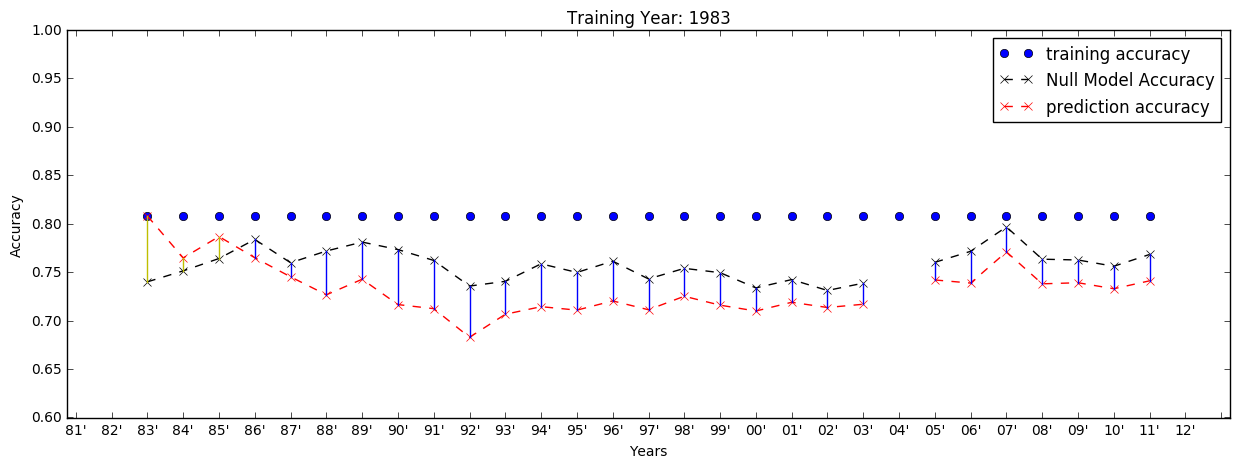

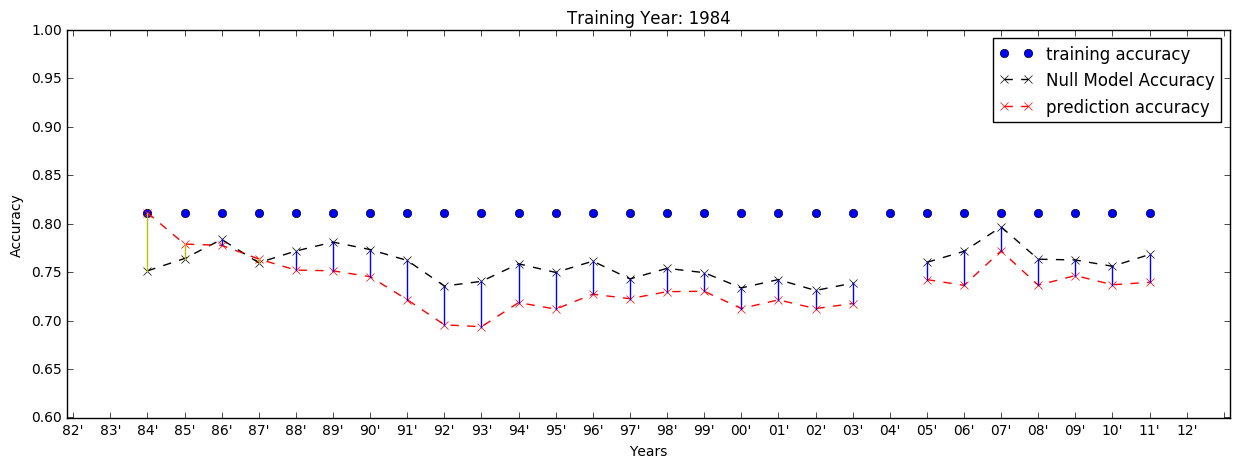

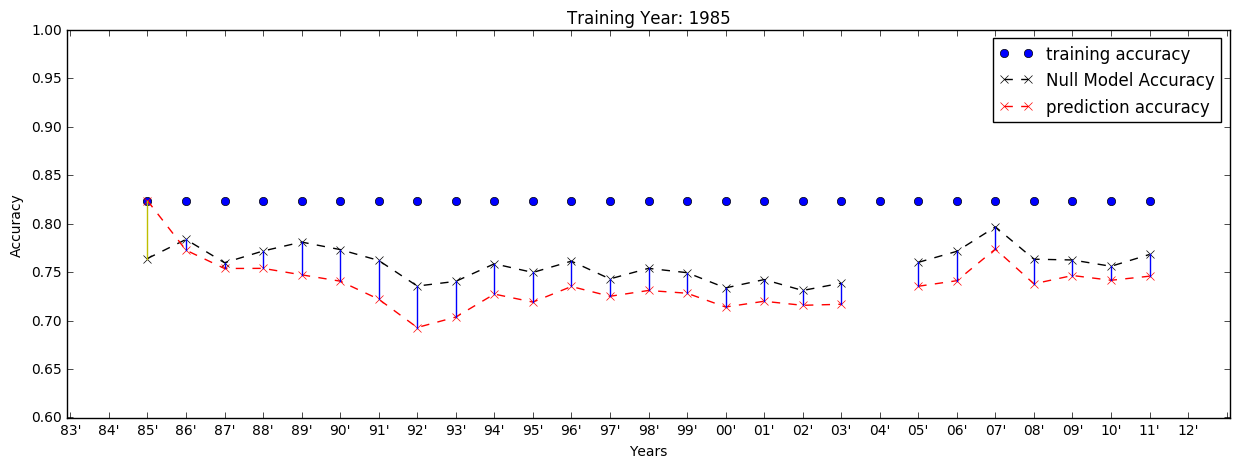

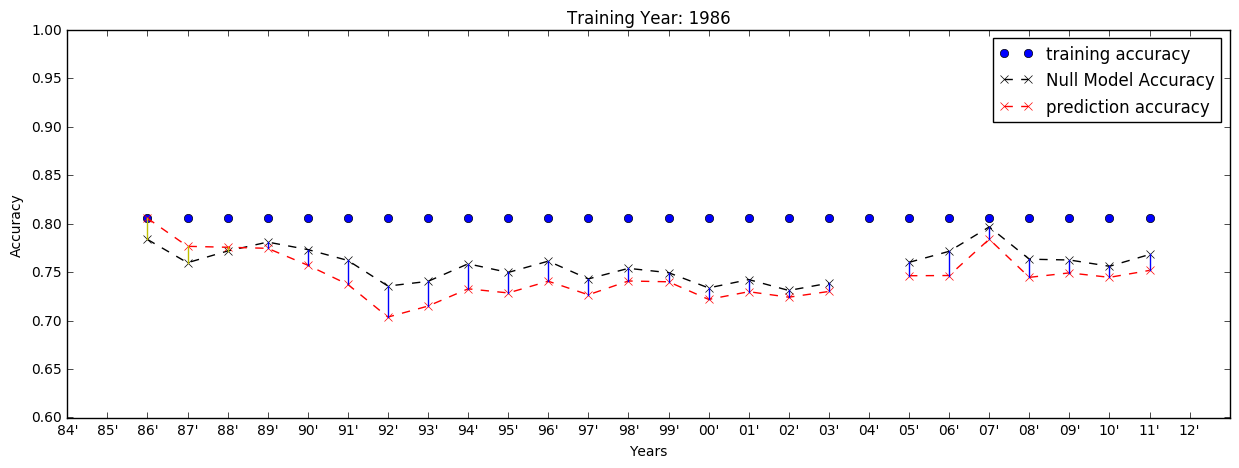

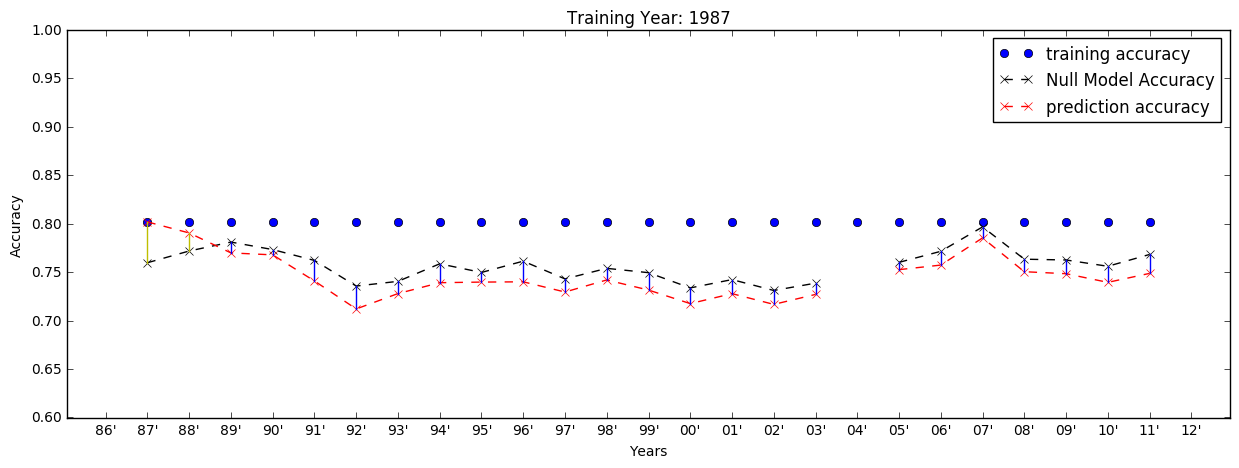

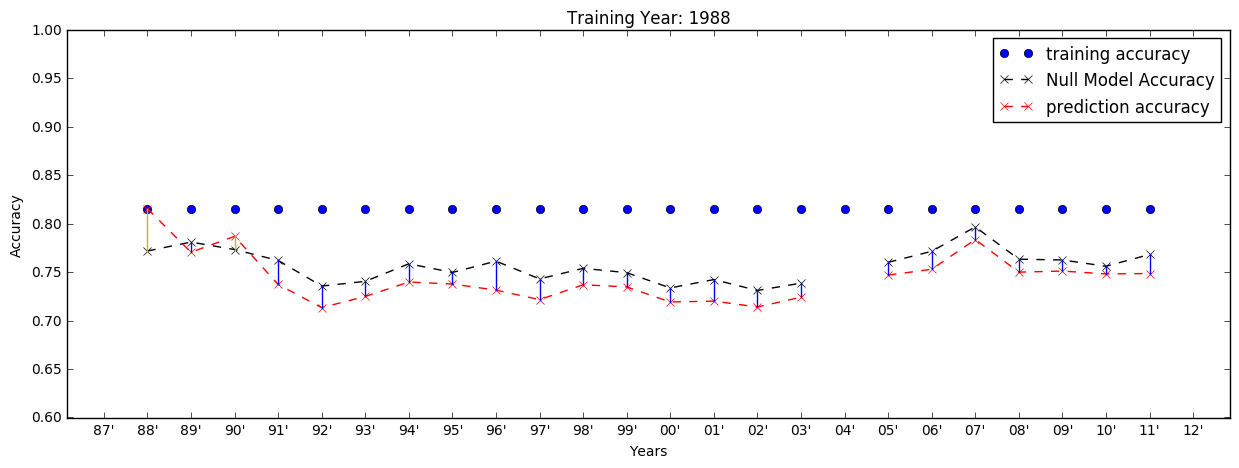

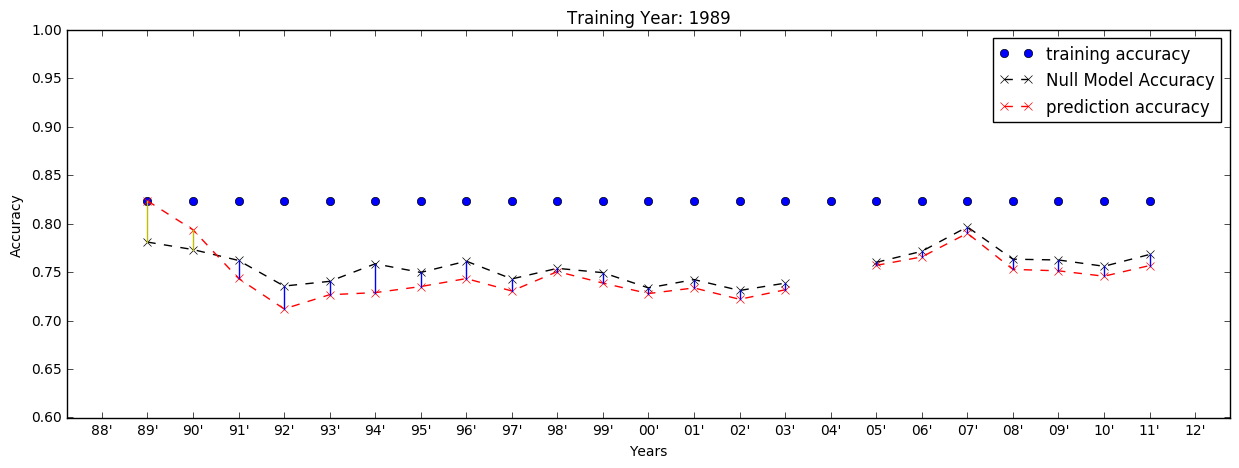

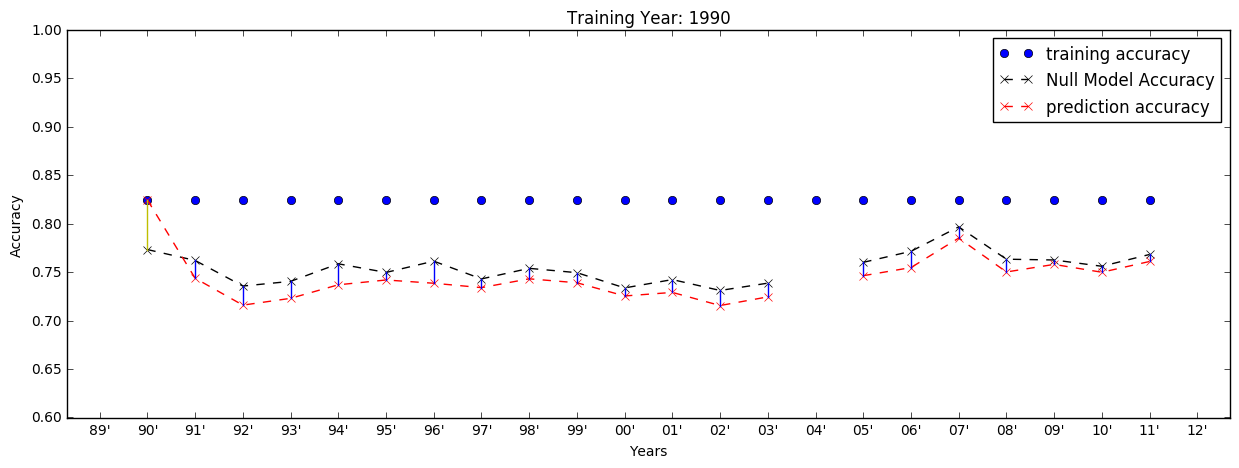

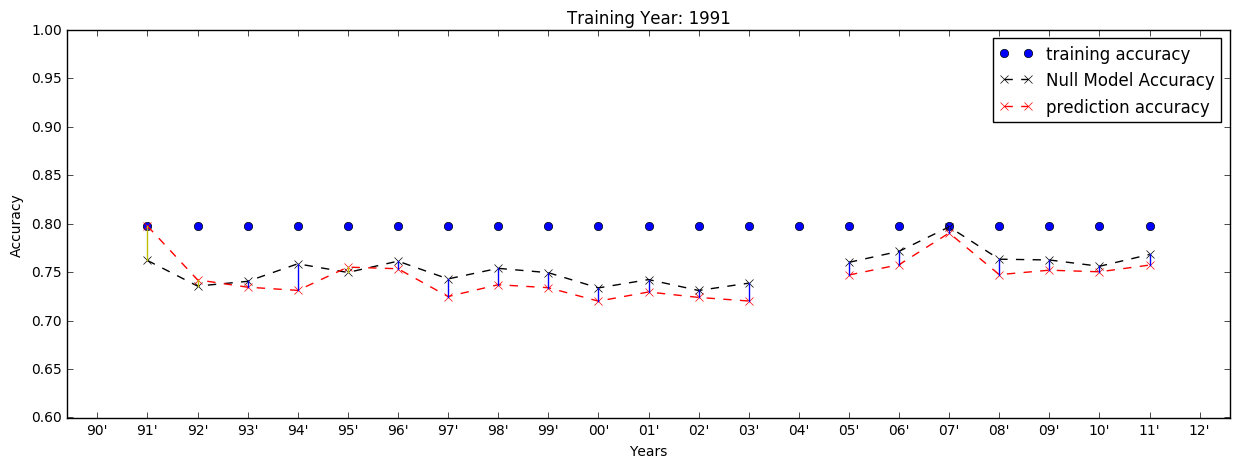

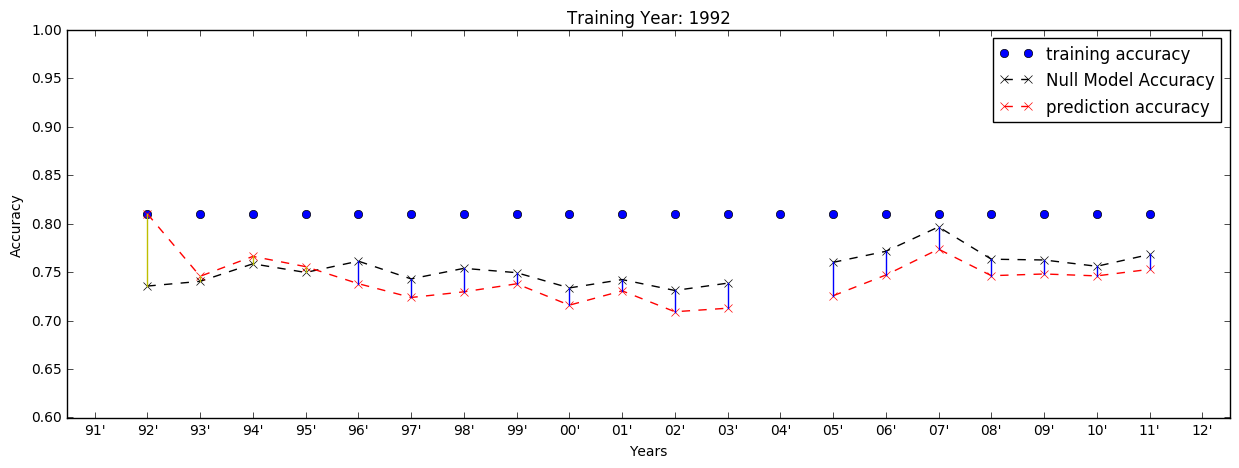

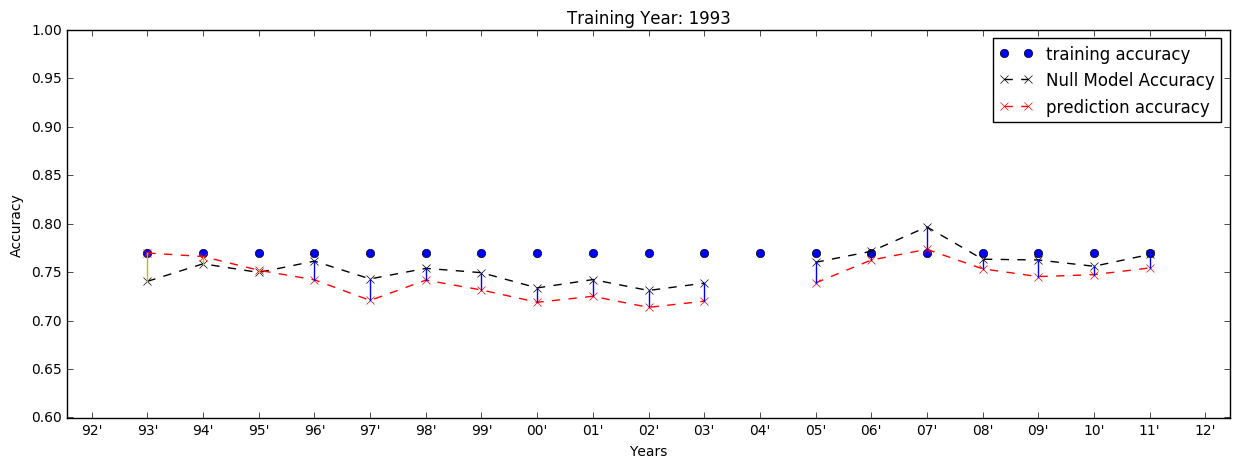

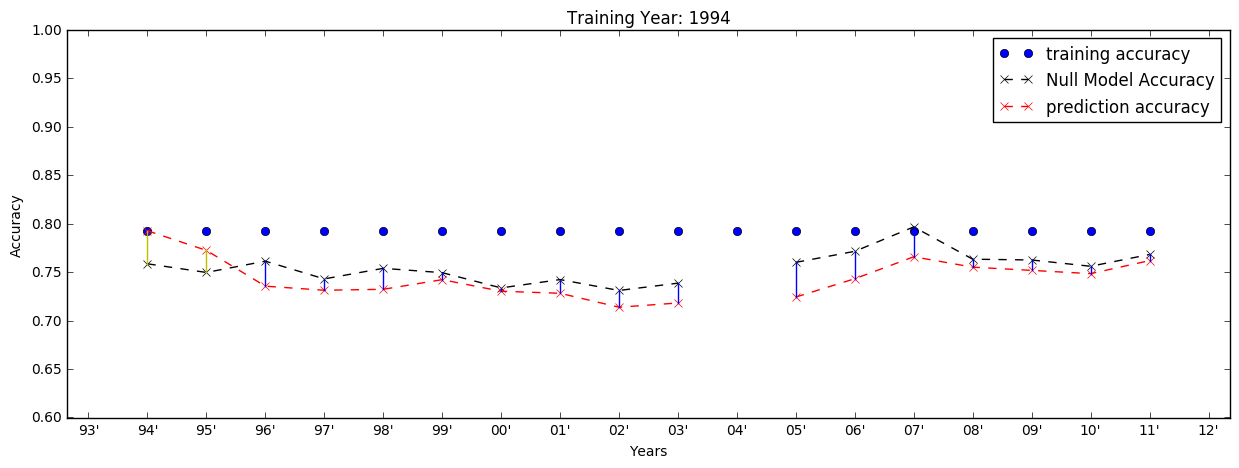

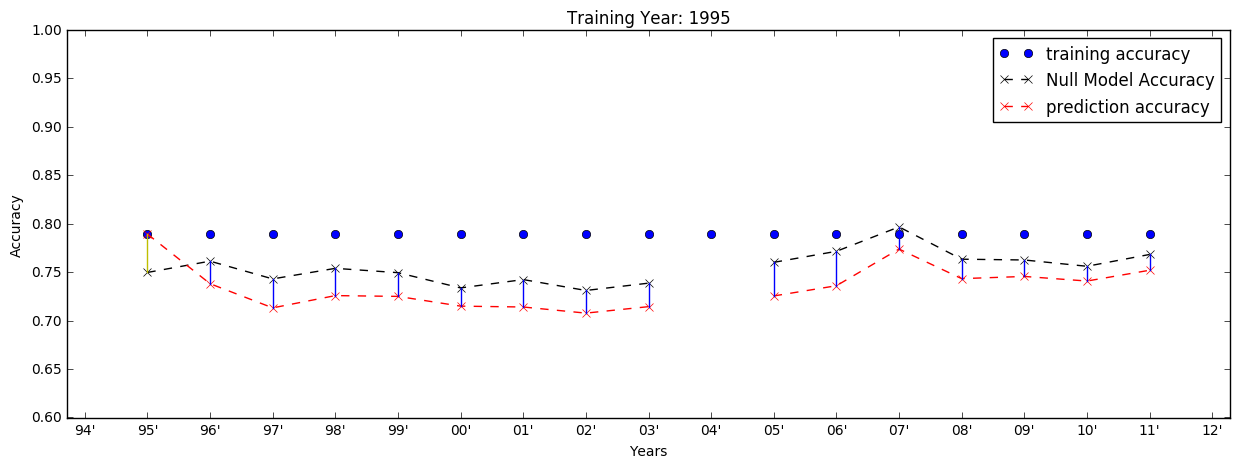

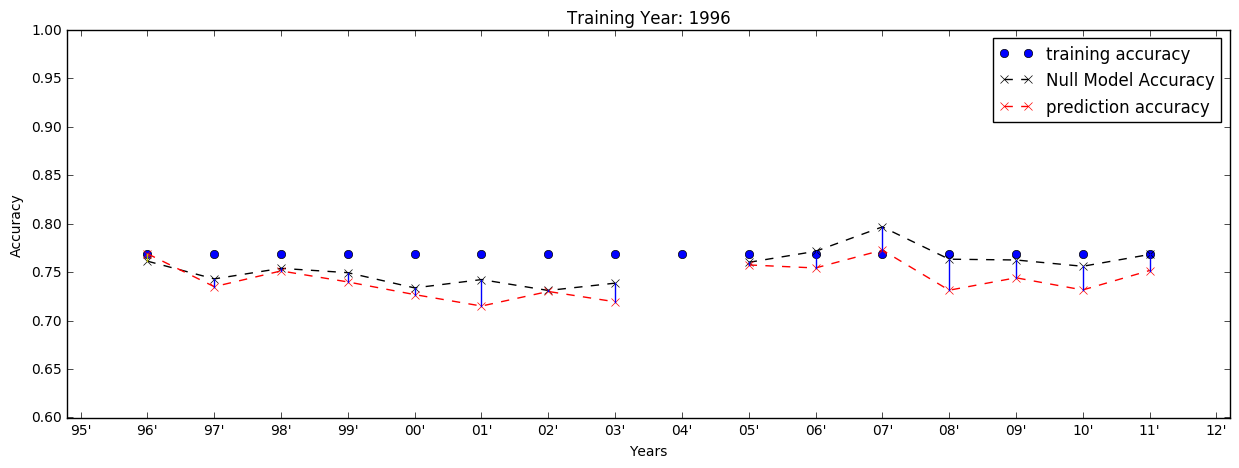

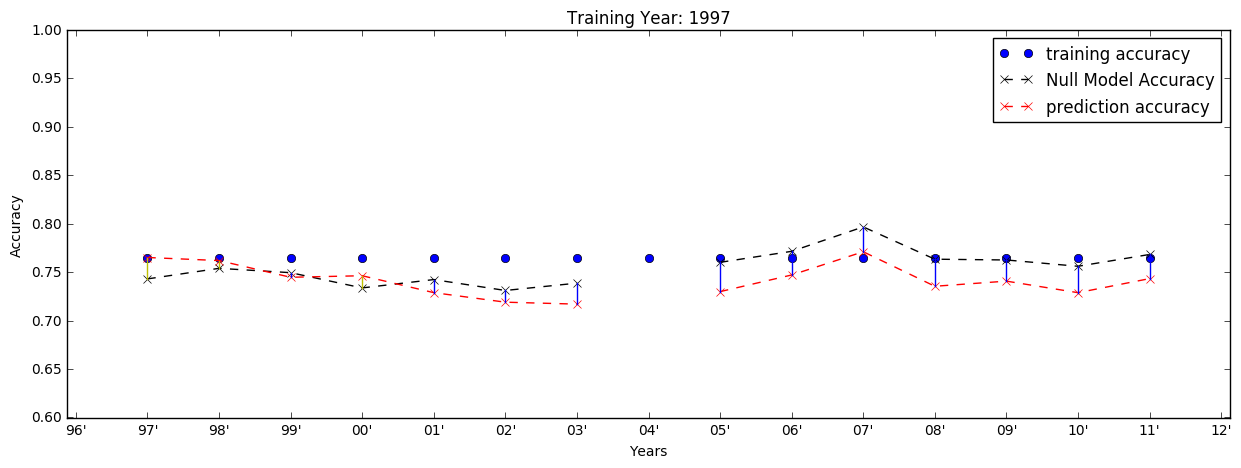

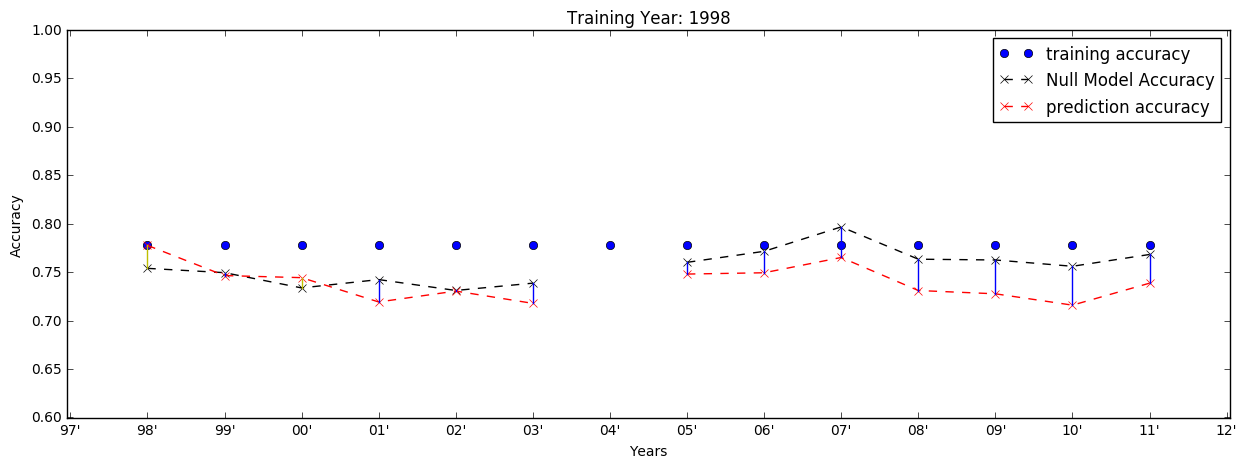

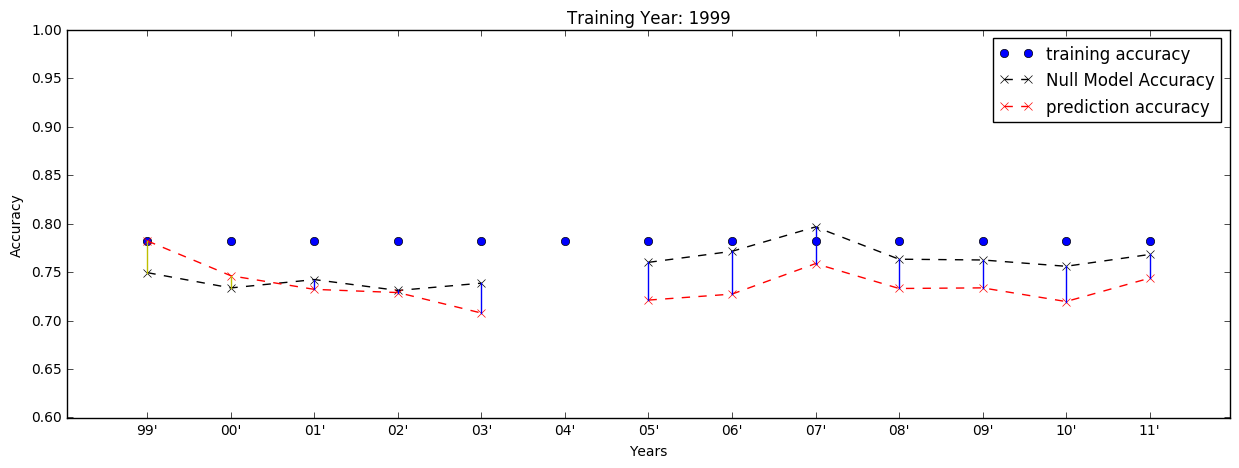

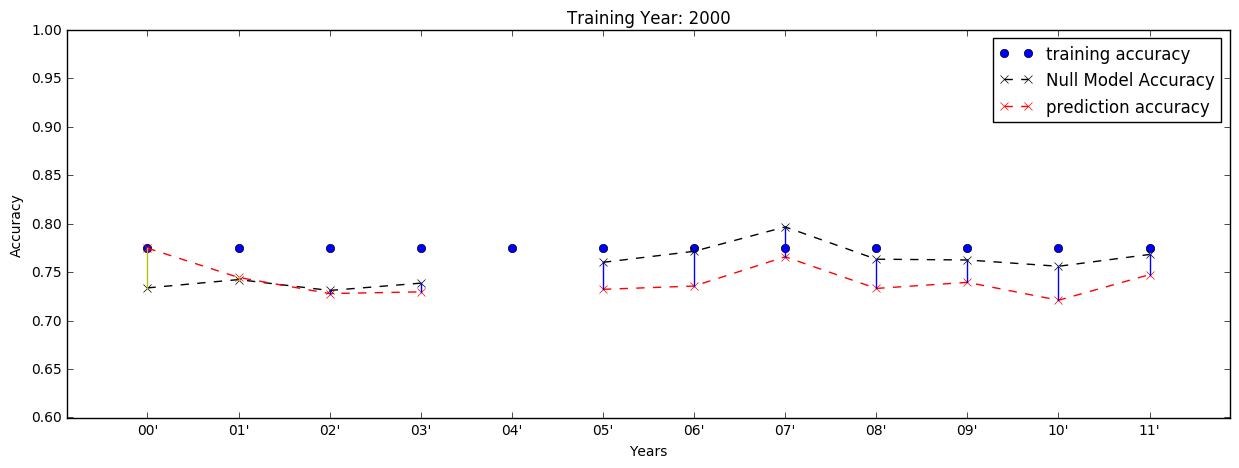

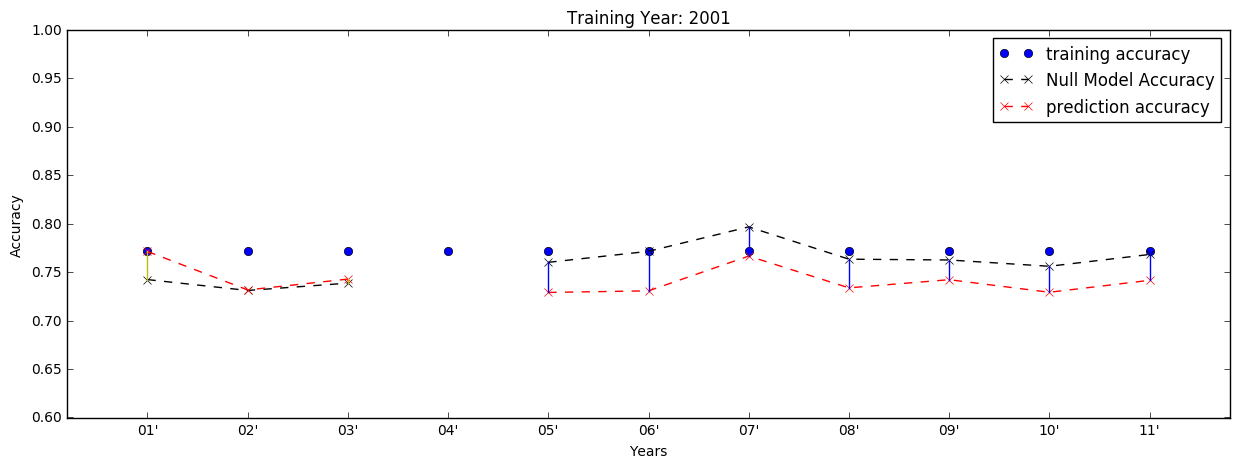

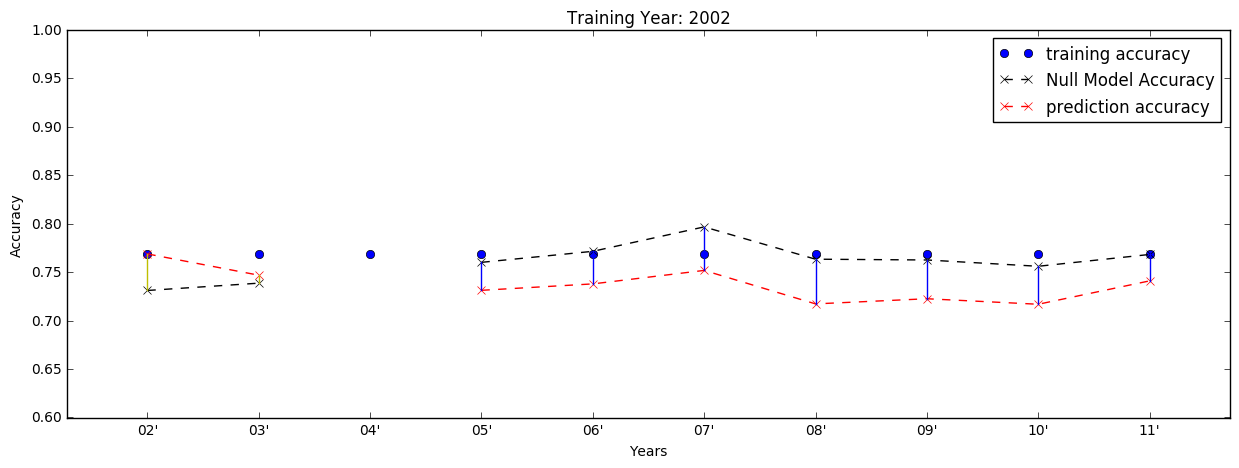

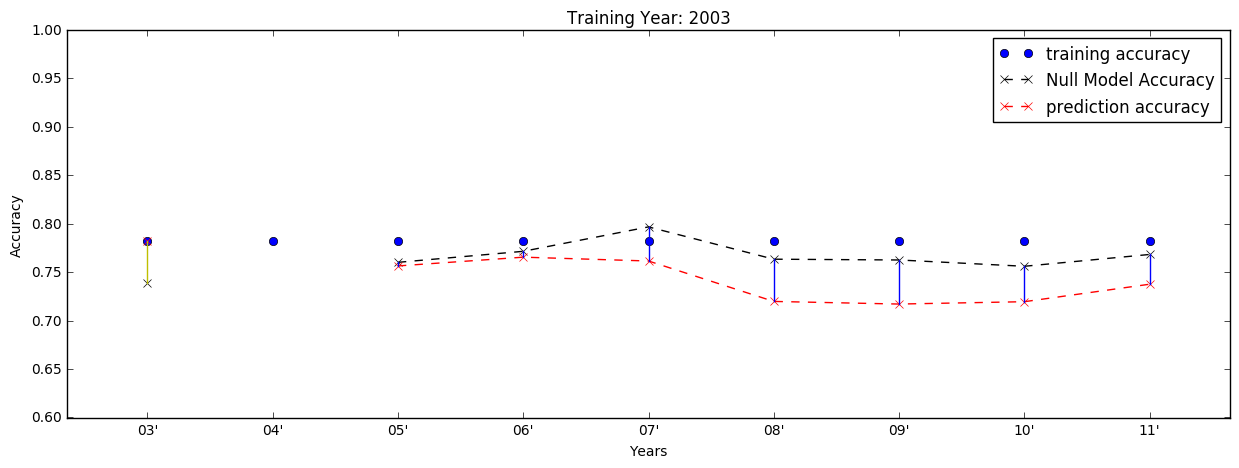

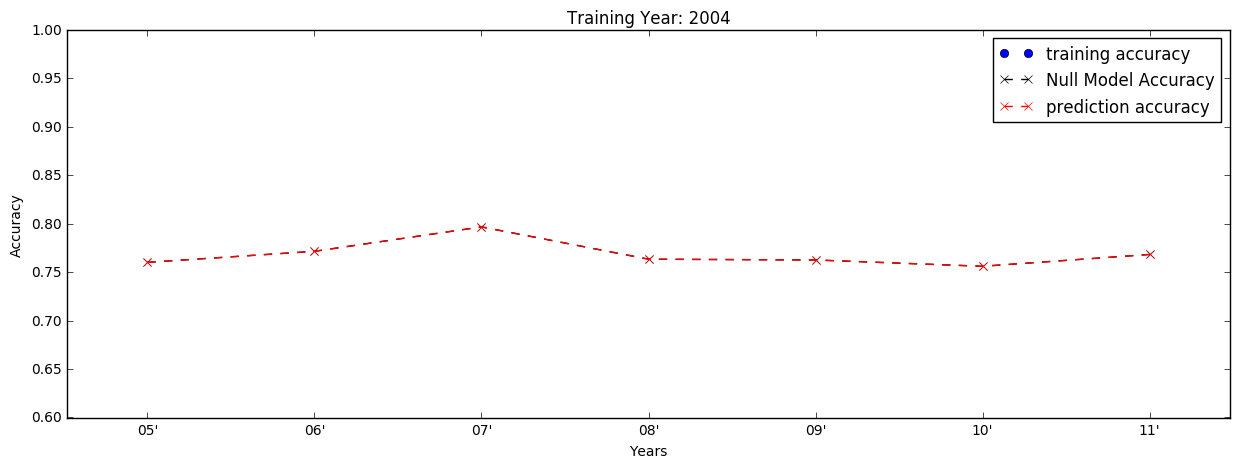

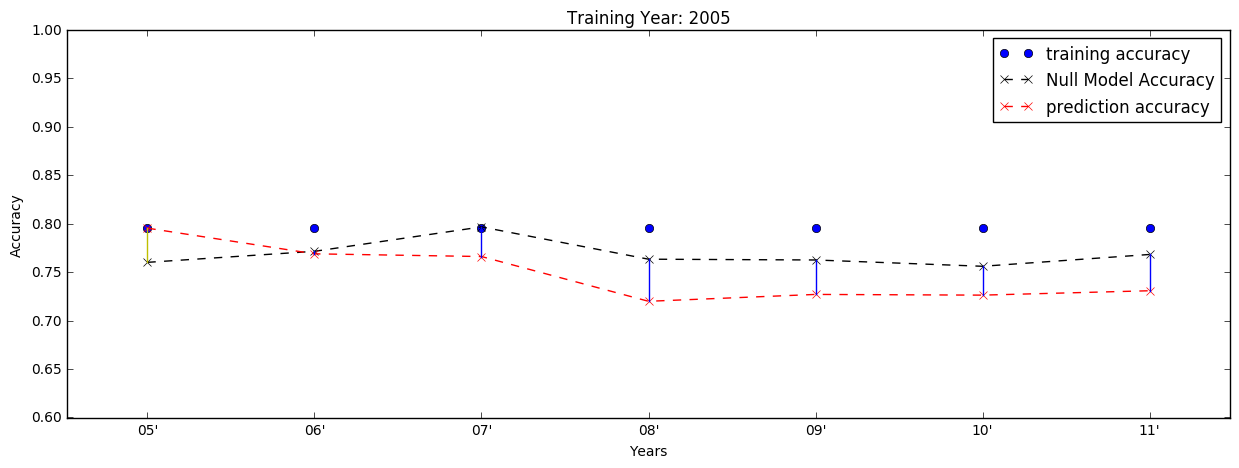

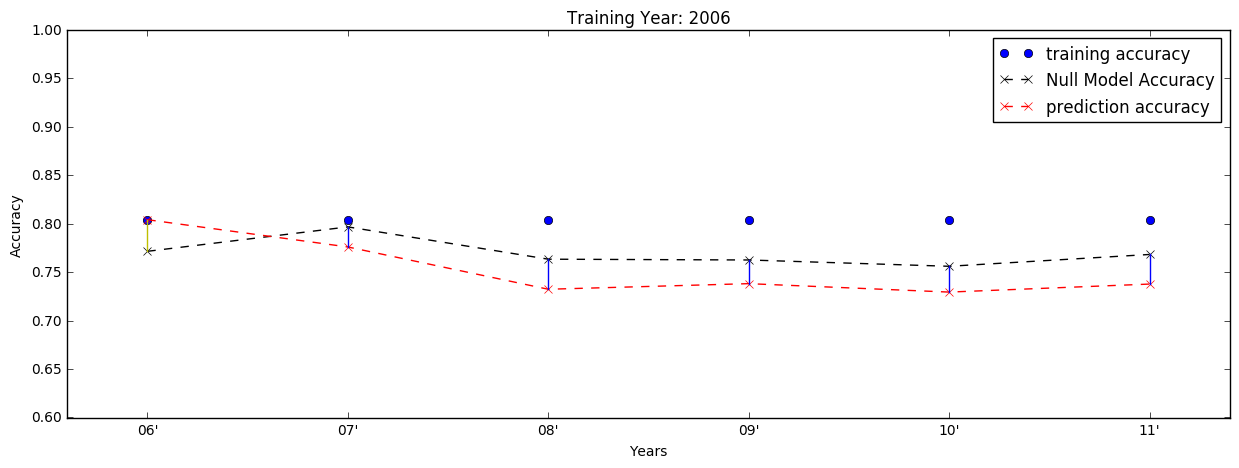

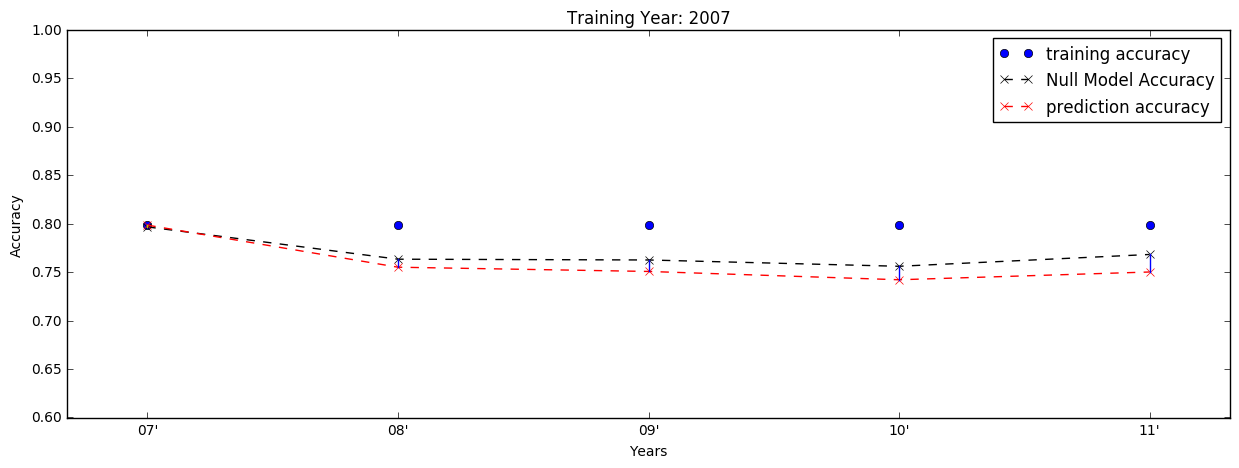

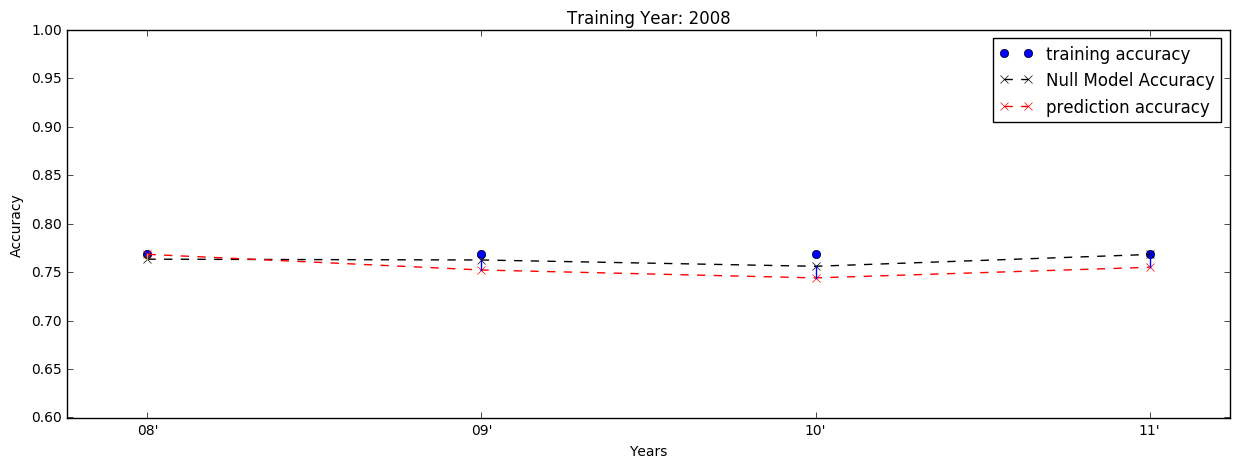

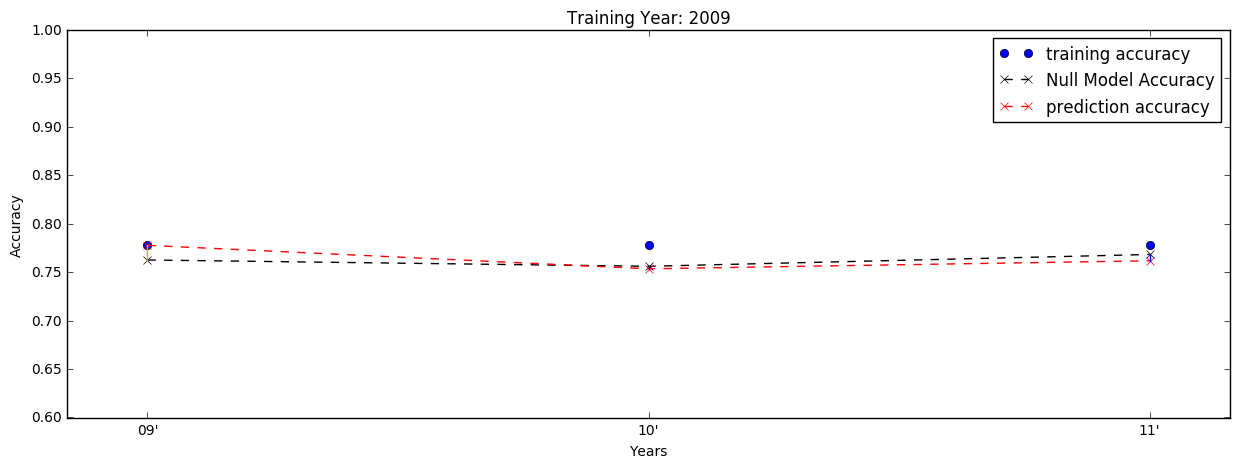

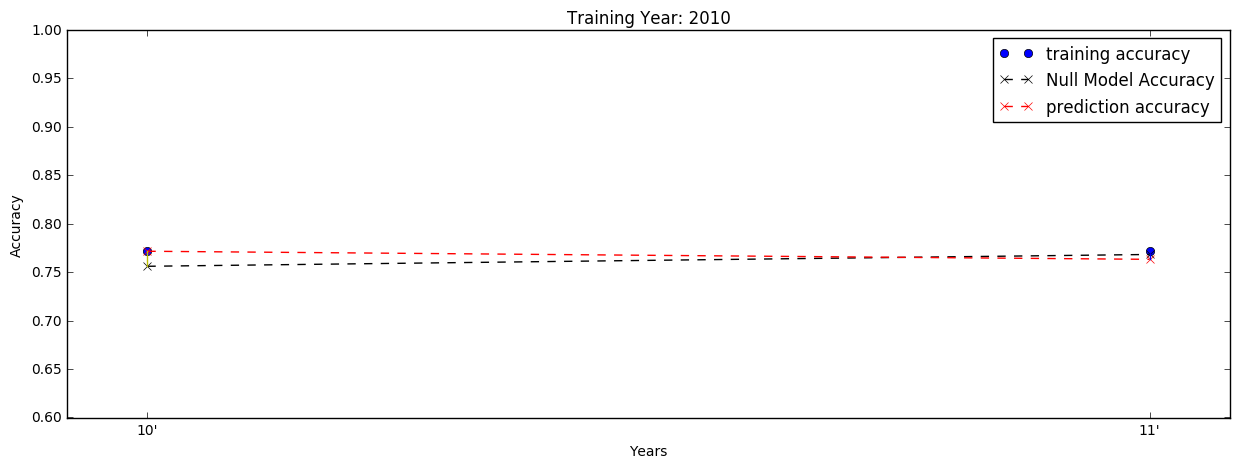

In [188]:
plotAllYears(Adj_years,accu_map_all)